<h3>Figure 1 plot currents, stokes drift, winds and temperature in the study region for december month of 2006, 2008, 2011, 2014 and 2021</h3>

In [1]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cm
import numpy as np
import pandas as pd
import plotly as pt
import plotly.express as px

np.set_printoptions(suppress=True)

Scripts to compute mean of currents, stokes drift and temperature from December of years- 2006, 2008, 2011, 2014, 2021

ncra -v VSDX,VSDY /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_REANALYSIS_WAV_004_015/metoffice_wave_amm15_NWS_WAV_3hi200612*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_REANALYSIS_WAV_004_015/metoffice_wave_amm15_NWS_WAV_3hi200812*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_REANALYSIS_WAV_004_015/metoffice_wave_amm15_NWS_WAV_3hi201112*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_REANALYSIS_WAV_004_015/metoffice_wave_amm15_NWS_WAV_3hi201412*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_REANALYSIS_WAV_004_015/metoffice_wave_amm15_NWS_WAV_3hi202112*.nc mean_stokesuv_December_Kemp.nc

ncra -d depth,0 -v uo,vo /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_CUR_dm200612*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_CUR_dm200812*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_CUR_dm201112*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_CUR_dm201412*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_CUR_dm202112*.nc mean_uovo_December_Kemp.nc

ncra -d depth,0 -v thetao /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_TEM_dm200612*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_TEM_dm200812*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_TEM_dm201112*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_TEM_dm201412*.nc /storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_TEM_dm202112*.nc mean_thetao_December_Kemp.nc

<h2>Currents and temperature data</h2>

In [2]:
stations = pd.read_csv('/nethome/manra003/KempsRidley_turtle_strandings/data/Locations_NL.csv')
min_lon = -5
min_lat = 47
max_lon = 8 
max_lat = 57

In [3]:
cu_ds=xr.open_dataset('/storage/home/manra003/data/mean_uovo_December_Kemp.nc')
temp_ds=xr.open_dataset('/storage/home/manra003/data/mean_thetao_December_Kemp.nc')

cu_z0=cu_ds.isel(time=0).isel(depth=0)
temp_z0=temp_ds.isel(time=0).isel(depth=0)
np.min(temp_z0.thetao),np.max(temp_z0.thetao)

(<xarray.DataArray 'thetao' ()>
 array(-1.3362335, dtype=float32)
 Coordinates:
     time     datetime64[ns] 2012-12-16T02:24:00
     depth    float32 0.0,
 <xarray.DataArray 'thetao' ()>
 array(17.370096, dtype=float32)
 Coordinates:
     time     datetime64[ns] 2012-12-16T02:24:00
     depth    float32 0.0)

In [4]:
cropped_temp=temp_ds.sel(latitude=slice(min_lat,max_lat), longitude=slice(min_lon,max_lon))
np.min(cropped_temp.thetao),np.max(cropped_temp.thetao)

(<xarray.DataArray 'thetao' ()>
 array(5.1097217, dtype=float32),
 <xarray.DataArray 'thetao' ()>
 array(13.148444, dtype=float32))

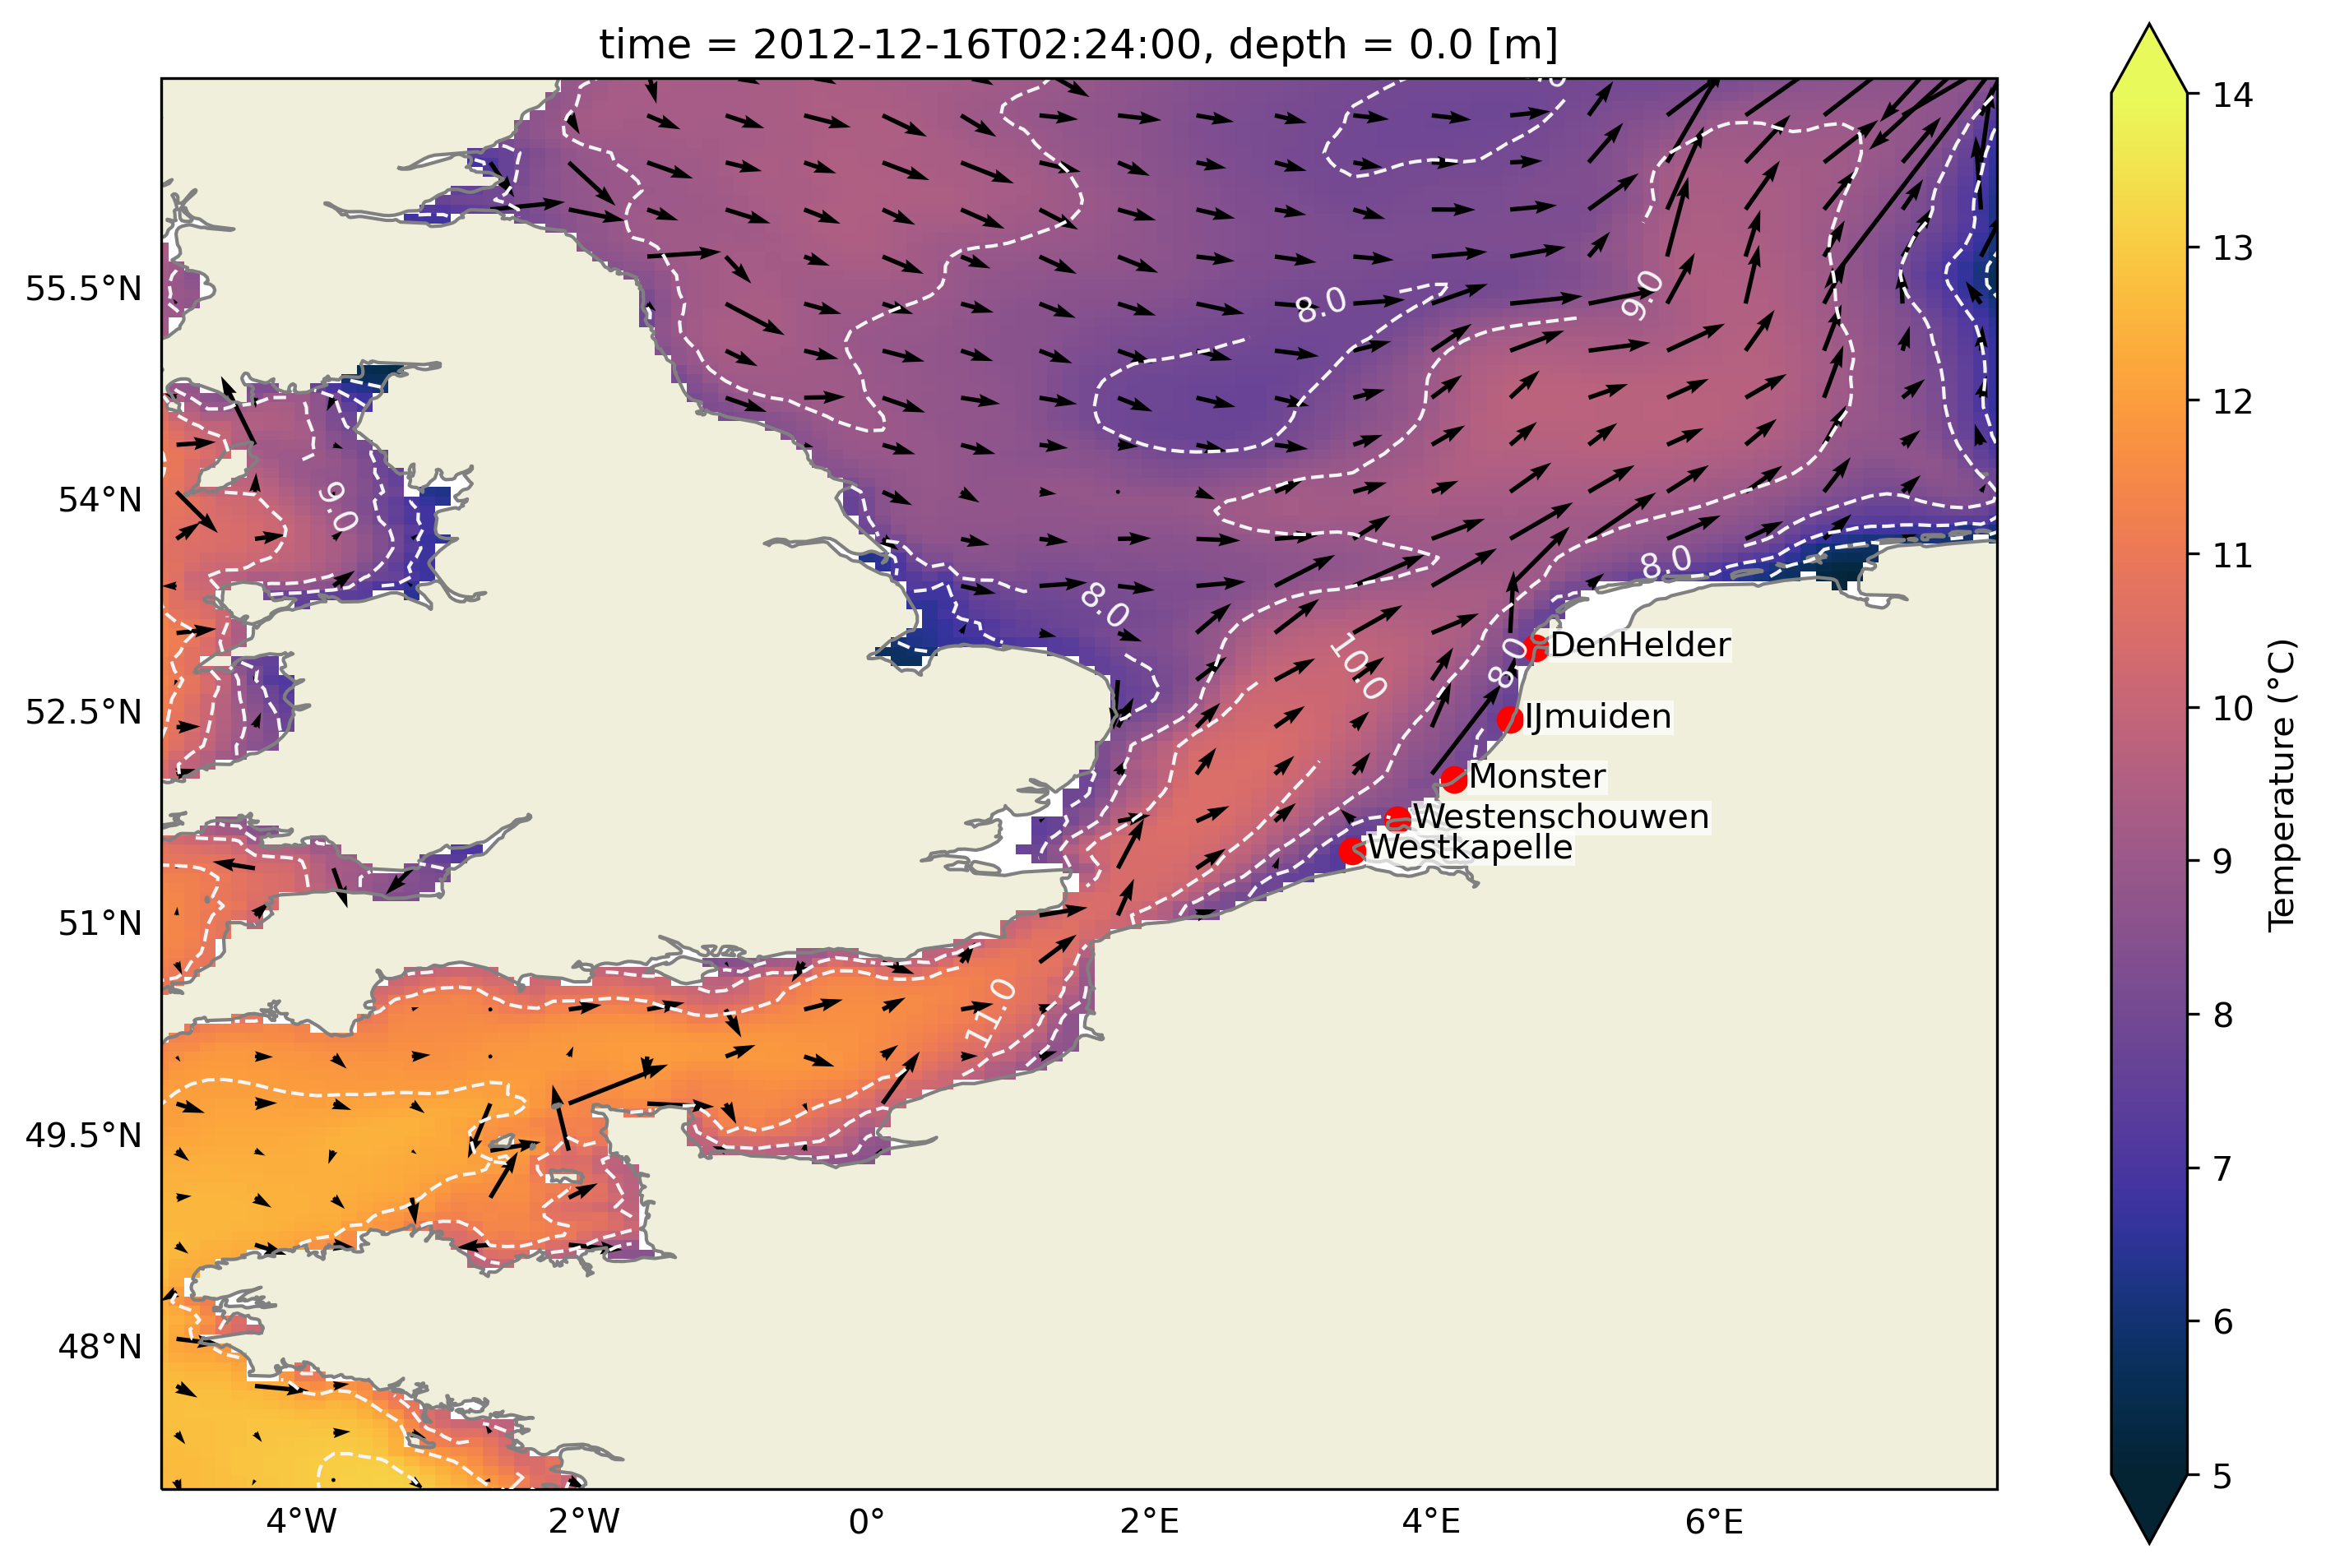

In [36]:
fig=plt.figure(figsize=(12,8),dpi=300) #generate figure  

ax = plt.subplot(111,projection=ccrs.PlateCarree())

temp_ds.thetao[0,0,:,:].plot(cmap=cm.cm.thermal,transform=ccrs.PlateCarree(),vmin=5,vmax=14,ax=ax,cbar_kwargs={'label':'Temperature (°C)'})
cs=temp_ds.thetao[0,0,:,:].plot.contour(vmin=5,vmax=14,ax=ax, colors='whitesmoke', levels=10, linestyles='dashed', linewidths=1)
ax.clabel(cs, fmt='%1.1f')
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
# ax.coastlines(resolution='50m')
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)


sampling = 5 #don't want to plot every arrow
idx = slice(None, None, sampling)

# cu_z0=cu_ds.isel(depth=0)

ax.quiver(cu_z0.longitude[idx],cu_z0.latitude[idx],
             cu_z0.uo[idx,idx],cu_z0.vo[idx,idx],transform=ccrs.PlateCarree(), scale=2)
st_names=['IJmuiden', 'Westenschouwen', 'Monster', 'DenHelder', 'Westkapelle']

for index, st in stations.iterrows():
    strand_lon, strand_lat = st['Longitude'], st['Latitude']
    plt.scatter(strand_lon, strand_lat, c='red', marker='o', s=50)
    ax.text(strand_lon + 0.1, strand_lat - 0.05, st_names[index],
            bbox=dict(facecolor='white', alpha=0.7, pad=0.2, edgecolor='none'),
            fontsize=10)
    
plt.savefig('MeanTemp_current.jpeg')
# cu_z0.plot.quiver(x='longitude', y='latitude', u='uo', v='vo', 
#                               transform=ccrs.PlateCarree(), scale=50)     

In [6]:
cu_ds.longitude.shape, cu_ds.latitude.shape, cu_ds.uo.isel(depth=0).shape, cu_ds.vo.isel(depth=0).shape

((297,), (375,), (1, 375, 297), (1, 375, 297))

<h2>Stokes drift data</h2>

In [7]:
stokes_ds=xr.open_dataset('/storage/home/manra003/data/mean_stokesuv_December_Kemp.nc')
# stokes_ds=stokes_ds.isel(time=0)
stokes_ds

<xarray.Dataset>
Dimensions:    (longitude: 958, latitude: 1240, time: 1)
Coordinates:
  * longitude  (longitude) float32 -16.0 -15.97 -15.94 ... 12.94 12.97 13.0
  * latitude   (latitude) float32 46.0 46.01 46.03 46.04 ... 62.72 62.73 62.74
  * time       (time) datetime64[ns] 2012-12-16T00:54:00
Data variables:
    crs        int32 ...
    VSDX       (time, latitude, longitude) float32 ...
    VSDY       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:          CF-1.7
    institution:          UK Met Office
    contact:              servicedesk.cmems@mercator-ocean.eu
    references:           http://marine.copernicus.eu/
    title:                3-hourly-instantaneous wave
    source:               Met Office Operational Suite, Atlantic Margin Model...
    forcing_data_source:  ECMWF; ERA-5"
    netcdf-version-id:    NETCDF4
    grid_id:              wave_nwshelf_standard_v1.1
    history:              Fri Mar  3 16:17:07 2023: ncra -v VSDX,VSDY /storag...
    NCO:                  netCDF Operators version 4.8.1 (Homepage = http://n...

In [8]:
stokes_full = np.hypot(stokes_ds.VSDX,stokes_ds.VSDY).isel(time=0).to_numpy()
np.nanmin(stokes_full), np.nanmax(stokes_full)

(0.0, 0.14015211)

In [9]:
cropped_stokes=stokes_ds.sel(latitude=slice(min_lat,max_lat), longitude=slice(min_lon,max_lon))
stokes_res = np.hypot(cropped_stokes.VSDX,cropped_stokes.VSDY).isel(time=0).to_numpy()
np.nanmin(stokes_res), np.nanmax(stokes_res)

(0.00027560626, 0.09909883)

In [20]:
stokes_dir = ((270 - np.degrees(np.arctan2(cropped_stokes.VSDY, cropped_stokes.VSDX))) % 360).isel(time=0).to_numpy()
# stokes_dir = (np.arctan2(-cropped_stokes.VSDX,-cropped_stokes.VSDY)*(180/np.pi)).to_numpy()
# stokes_dir[stokes_dir<0]+=360
# Define the direction bins
direction_bins = np.arange(0,361,22.5)
# Convert the wind speed and direction data into a histogram
stokes_hist,theta,r = np.histogram2d(stokes_dir.flatten(), stokes_res.flatten(), bins=[direction_bins, 2],range=[[0, 360], [0, 0.1]])

In [11]:
u=1
v=-1
np.degrees(np.arctan2(v, u)) +360

315.0

In [12]:
((270 - np.degrees(np.arctan2(v, u))) % 360)

315.0

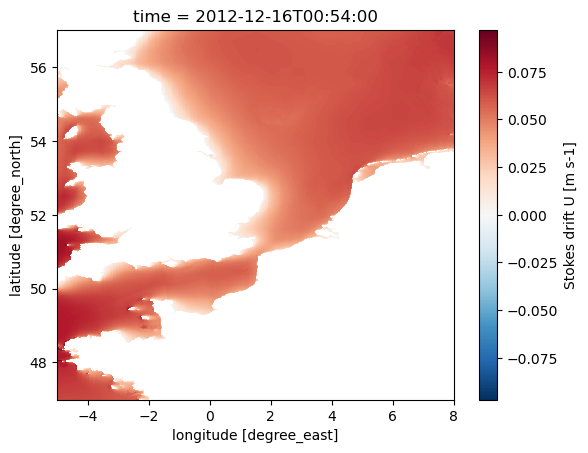

In [13]:
cropped_stokes.VSDX.plot()

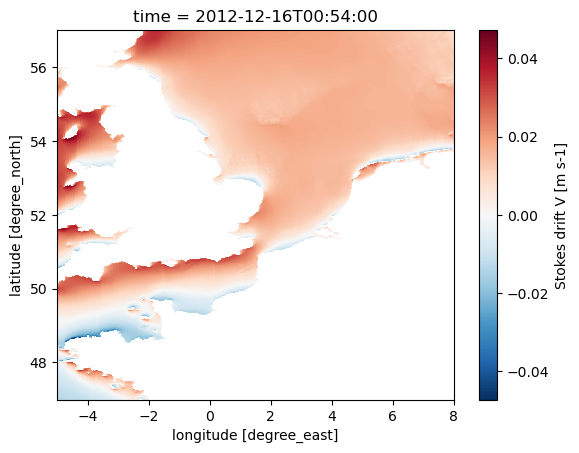

In [14]:
cropped_stokes.VSDY.plot()

In [21]:
np.set_printoptions(suppress=True)
r

array([0.  , 0.05, 0.1 ])

In [22]:
stokes_new=stokes_hist/np.sum(stokes_hist)*100
theta_a=['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
# speed_a=['0.00 - 0.025','0.025 - 0.050','0.050 - 0.075','0.075 - 0.100']
speed_a=['0.00 - 0.05','0.05 - 0.10']
# speed_a=np.arange(0,10,1)
mesh=np.meshgrid(speed_a,theta_a)
stokes_new

array([[ 0.01268857,  0.        ],
       [ 0.00281968,  0.        ],
       [ 0.00493444,  0.        ],
       [ 0.00493444,  0.        ],
       [ 0.0035246 ,  0.        ],
       [ 0.0035246 ,  0.        ],
       [ 0.00986888,  0.        ],
       [ 0.03242634,  0.        ],
       [ 0.34752573,  0.        ],
       [ 1.93923587,  0.02396729],
       [ 4.84844213,  5.97419992],
       [11.59523474, 65.05498379],
       [ 3.84322572,  5.0070492 ],
       [ 0.87480615,  0.14450867],
       [ 0.22416467,  0.00140984],
       [ 0.04652474,  0.        ]])

In [23]:
stokes=pd.DataFrame({'speed': mesh[0].flatten(), 'direction': mesh[1].flatten(), 'frequency': stokes_new.flatten()})

fig = px.bar_polar(stokes, r="frequency", theta="direction",
                   color="speed",template="none",
                   # color_continuous_scale= pt.colors.sequential.Blues,
                   color_discrete_sequence= pt.colors.sequential.Brwnyl,
                   labels={"speed": "Stokes drift (m/s)"})
fig.update_layout(
    font_size=15,
    legend_font_size=20,
    polar_radialaxis_ticksuffix='%',
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)',
    polar_radialaxis={'showticklabels': False},
    # polar_angularaxis={'visible': False, 'showticklabels': False}
    polar_angularaxis={'showticklabels': False}
)
fig.show()
fig.write_image('stokes_dec.png', scale=4)


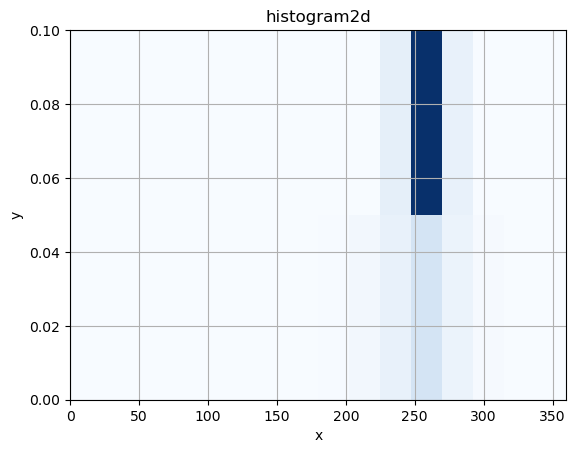

In [24]:
fig, (ax1) = plt.subplots(ncols=1)

ax1.pcolormesh(theta,r, stokes_hist.T, cmap='Blues')

# ax1.plot(x, 2*np.log(x), 'k-')

# ax1.set_xlim(x.min(), x.max())

# ax1.set_ylim(y.min(), y.max())

ax1.set_xlabel('x')

ax1.set_ylabel('y')

ax1.set_title('histogram2d')

ax1.grid()

In [25]:
# # Create the wind rose plot
# fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
# ax.set_theta_direction(-1)
# ax.set_theta_zero_location('N')
# ax.set_xticks(direction_bins[:-1] * np.pi / 180.0)
# # ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
# ax.set_yticks([1, 3, 5, 7])
# ax.set_yticklabels(['0.25', '0.5', '0.75', '1.0'])
# ax.pcolormesh(np.radians(direction_bins), [0, 1, 3, 5, 7], stokes_hist.T, cmap='Blues')
# plt.show()

<h2>Wind data</h2>

In [26]:
data_path = '/nethome/manra003/analysis/KempRidley/ERA5_EUWsubset/'
wind_files= sorted(glob(data_path + 'reanalysis-era5-single-level_wind10m_200612*.nc')
                     +glob(data_path + 'reanalysis-era5-single-level_wind10m_200812*.nc')
                     +glob(data_path + 'reanalysis-era5-single-level_wind10m_201112*.nc')
                     +glob(data_path + 'reanalysis-era5-single-level_wind10m_201412*.nc')
                     +glob(data_path + 'reanalysis-era5-single-level_wind10m_202112*.nc'))

In [27]:
wind_ds = xr.open_mfdataset(wind_files).mean('time')
wind_ds

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 101)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 40.5 40.25 40.0
Data variables:
    u10        (latitude, longitude) float32 dask.array<chunksize=(101, 121), meta=np.ndarray>
    v10        (latitude, longitude) float32 dask.array<chunksize=(101, 121), meta=np.ndarray>

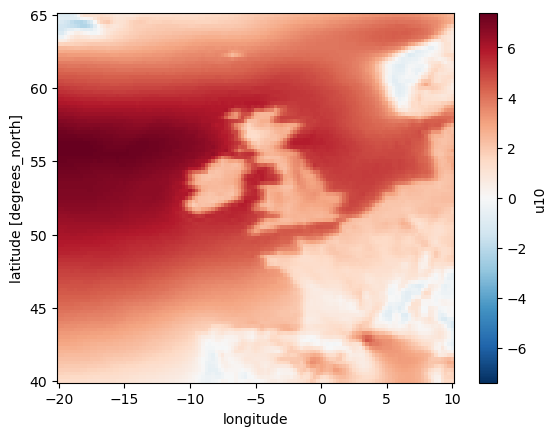

In [28]:
wind_ds.u10.plot()

In [29]:
cropped_wind = wind_ds.sel(latitude=slice(max_lat, min_lat), longitude=slice(min_lon,max_lon))
wind_res = np.hypot(cropped_wind.u10,cropped_wind.v10).to_numpy()
print(np.min(wind_res), np.max(wind_res))

0.42094943 6.4622893


In [30]:
wind_dir  = ((270 - np.degrees(np.arctan2(cropped_wind.v10, cropped_wind.u10))) % 360).to_numpy()
# Convert the wind speed and direction data into a histogram

wind_hist, w_theta, w_r = np.histogram2d(wind_dir.flatten(), wind_res.flatten(), bins=[direction_bins, 4],range=[[0, 360], [0, 7]])
w_r

array([0.  , 1.75, 3.5 , 5.25, 7.  ])

In [31]:
wind_new = wind_hist/np.sum(wind_hist)*100
theta_a = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
# speed_a = ['0 - 1.5','1.5 - 3.0', '3.0 - 4.5','4.5 - 6.0']
speed_a = ['0.00 - 1.75','1.75 - 3.50', '3.50 - 5.25','5.25 - 7.00']

# speed_a=np.arange(0,10,1)
mesh = np.meshgrid(speed_a,theta_a)
wind_new

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.3221353 ,  0.04601933,  0.        ,  0.        ],
       [ 1.24252186,  3.54348827,  0.        ,  0.        ],
       [ 6.81086056, 31.20110446,  9.6640589 ,  3.91164289],
       [ 1.4726185 ,  5.93649333, 20.52462034, 12.83939254],
       [ 0.13805798,  1.74873447,  0.59825127,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [32]:
winds=pd.DataFrame({'speed': mesh[0].flatten(), 'direction': mesh[1].flatten(), 'frequency': wind_new.flatten()})

fig = px.bar_polar(winds, r="frequency", theta="direction",
                   color="speed",template="none",
                   # color_continuous_scale= pt.colors.sequential.Blues,
                   color_discrete_sequence= pt.colors.sequential.Purpor,
                   labels={"speed": "Wind (m/s)"})
fig.update_layout(
    font_size=15,
    legend_font_size=20,
    polar_radialaxis_ticksuffix='%',
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    paper_bgcolor = 'rgba(0, 0, 0, 0)',
    polar_radialaxis={'showticklabels': False},
    # polar_angularaxis={'visible': False, 'showticklabels': False}
    polar_angularaxis={'showticklabels': False}
)
fig.show()
fig.write_image('winds_dec.png', scale=4)


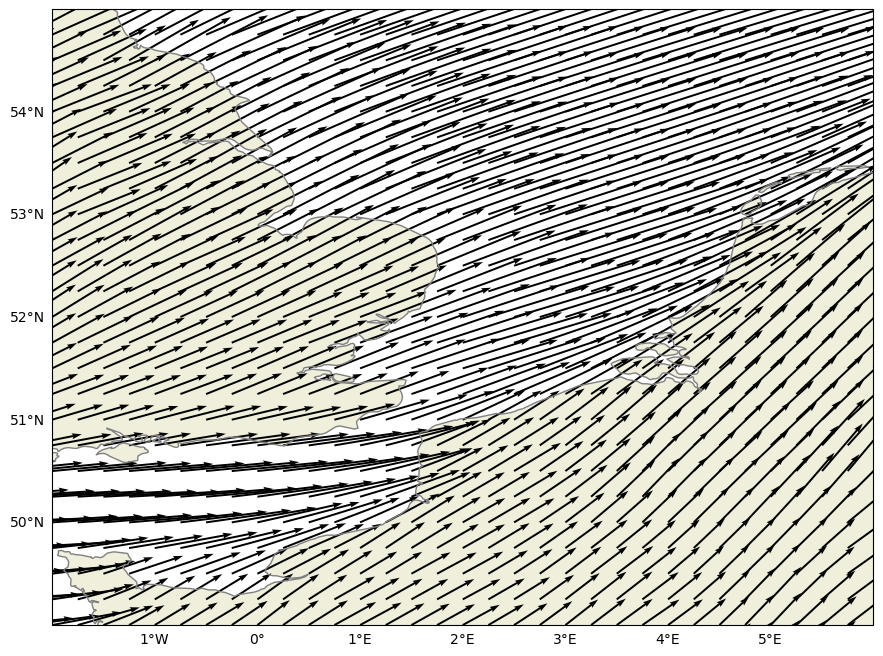

In [33]:
fig=plt.figure(figsize=(12,8)) #generate figure  

ax = plt.subplot(111,projection=ccrs.PlateCarree())
# wind_ds.thetao.plot(cmap=cm.cm.thermal,transform=ccrs.PlateCarree(),vmin=0,vmax=15,ax=ax,cbar_kwargs={'label':'Temperature [C]'})

gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
# ax.coastlines(resolution='50m')
ax.set_xlim()
ax.set_xlim(-2,6)
ax.set_ylim(49,55)
sampling = 1 #don't want to plot every arrow
idx = slice(None, None, sampling)

# cu_z0=cu_ds.isel(depth=0)

ax.quiver(wind_ds.longitude[idx],wind_ds.latitude[idx],
             wind_ds.u10[idx,idx],wind_ds.v10[idx,idx],transform=ccrs.PlateCarree(), scale=40)


# wind_ds.plot.quiver(x='longitude', y='latitude', u='u10', v='v10', 
#                               transform=ccrs.PlateCarree(), scale=50)     